In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
plt.style.use('default')


In [45]:
# 
# Freqently used physical quantities
# 

def electron_density(field, data):
    return data[('flash', 'dens')]/(yt.units.atomic_mass_unit_cgs*1.18)
yt.add_field(
    ('gas', 'electron_density'), 
    function=electron_density, 
    sampling_type='cell',
    units='cm**(-3)',
    force_override=True
)

def temp_in_keV(field, data): 
    return yt.units.boltzmann_constant_cgs * data[('flash', 'temp')]
yt.add_field(
    ("gas", "temp_in_keV"), 
    function = temp_in_keV, 
    sampling_type='cell', 
    units='keV',
    force_override=True
)

def entropy(field, data):
    return data[("gas", "temp_in_keV")] * data[('gas', 'electron_density')]**(-2/3)
yt.add_field(
    ("gas", "entropy"), 
    function = entropy, 
    sampling_type='cell', 
    units='keV*cm**2',
    force_override=True
)

def potential(field, data):
    return data[('flash', 'gpot')] * (-1)
yt.add_field(
    ("gas", "potential"), 
    function = potential, 
    sampling_type='cell', 
    units='erg/g',
    force_override=True
)


# 
# Modified "code unit" to real unit
# 

def density(field, data):
    return data[('flash', 'dens')]
yt.add_field(
    ('gas', 'density'), 
    function=density, 
    sampling_type='cell',
    units='g*cm**(-3)',
    force_override=True
)


def pressure(field, data):
    return data[('flash', 'pres')]
yt.add_field(
    ('gas', 'pressure'), 
    function=pressure, 
    sampling_type='cell',
    units='Ba',
    force_override=True
)

def sub2(field, data):
    return data[('flash', 'sub2')] + 1e-3
yt.add_field(
    ('gas', 'sub2'), 
    function=sub2, 
    sampling_type='cell',
    # units='',
    force_override=True
)

In [65]:
num = 363

In [66]:
ds = yt.load('/data/yhgong/galaxy_cluster_merger/mass_scalar/perseus_merger_hdf5_plt_cnt_%04d'%num)

yt : [INFO     ] 2022-12-26 00:29:08,410 Parameters: current_time              = 5.7749748178436936e+16
yt : [INFO     ] 2022-12-26 00:29:08,413 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-12-26 00:29:08,415 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2022-12-26 00:29:08,416 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2022-12-26 00:29:08,418 Parameters: cosmological_simulation   = 0


In [48]:
dsIC = yt.load('/data/yhgong/galaxy_cluster_merger/mass_scalar/perseus_merger_hdf5_plt_cnt_0180')

yt : [INFO     ] 2022-12-25 23:57:27,399 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-25 23:57:27,401 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-12-25 23:57:27,403 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2022-12-25 23:57:27,404 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2022-12-25 23:57:27,405 Parameters: cosmological_simulation   = 0


### Mass scalar

yt : [INFO     ] 2022-12-25 23:35:03,851 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 23:35:03,852 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 23:35:03,854 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 23:35:03,855 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 23:35:03,857 Making a fixed resolution buffer of (('flash', 'sub2')) 800 by 800
yt : [WARNING  ] 2022-12-25 23:35:04,115 Plotting ('flash', 'sub2'): Both positive and negative values. Min = 0.0 dimensionless, Max = 1.0000000000000742 dimensionless.
yt : [WARNING  ] 2022-12-25 23:35:04,116 Switching to symlog colorbar scaling.



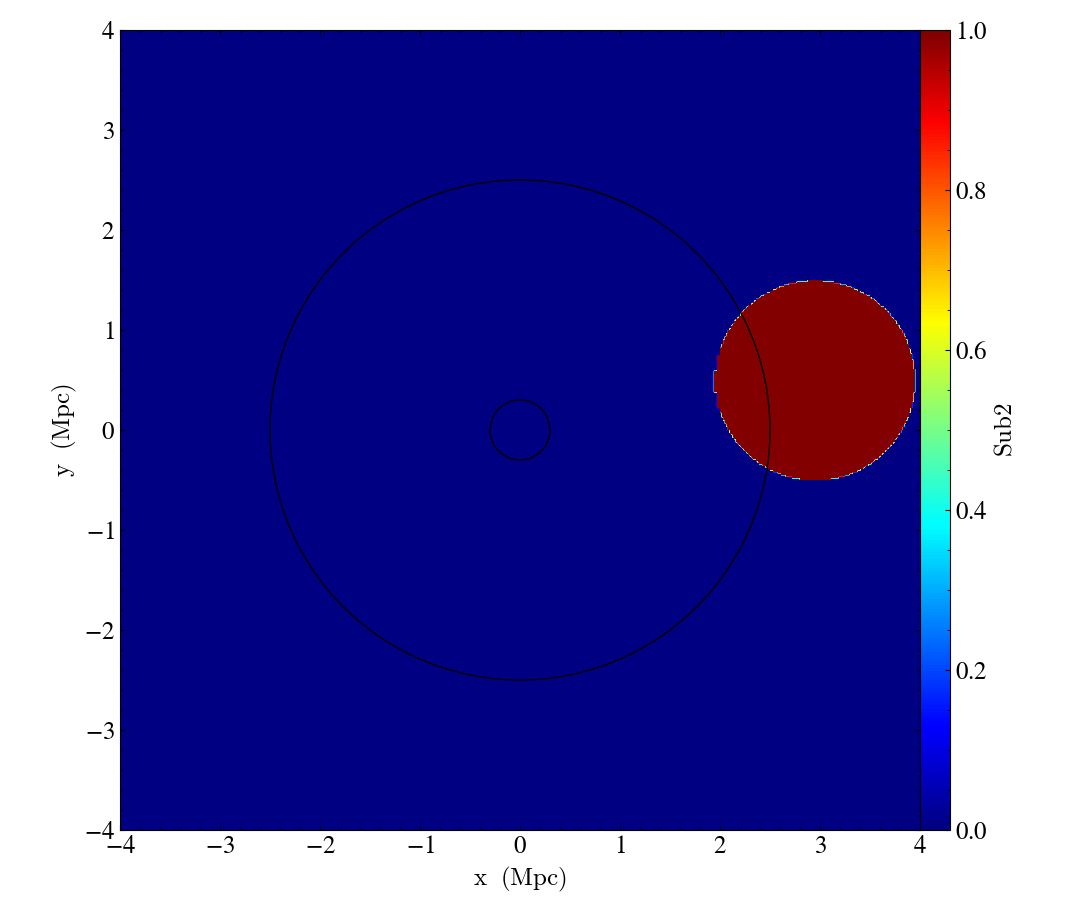

In [35]:
# 180
p = yt.SlicePlot(
    dsIC, 
    'z', 
    [('flash','sub2')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'sub2')], 'Blue-Red')
p.set_zlim(('flash', 'sub2'), 0, 1)
p.set_log(('flash', 'sub2'), False)
p.annotate_sphere([0,0,0], radius=(300,  "kpc"), circle_args={"color": "black"})
p.annotate_sphere([0,0,0], radius=(2500, "kpc"), circle_args={"color": "black"})
p.show()

yt : [INFO     ] 2022-12-25 19:13:05,669 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 19:13:05,677 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 19:13:05,679 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 19:13:05,680 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 19:13:05,684 Making a fixed resolution buffer of (('flash', 'sub2')) 800 by 800
yt : [WARNING  ] 2022-12-25 19:13:06,344 Plotting ('flash', 'sub2'): Both positive and negative values. Min = -2.1923933871099562e-38 dimensionless, Max = 1.0000114090226806 dimensionless.
yt : [WARNING  ] 2022-12-25 19:13:06,346 Switching to symlog colorbar scaling.



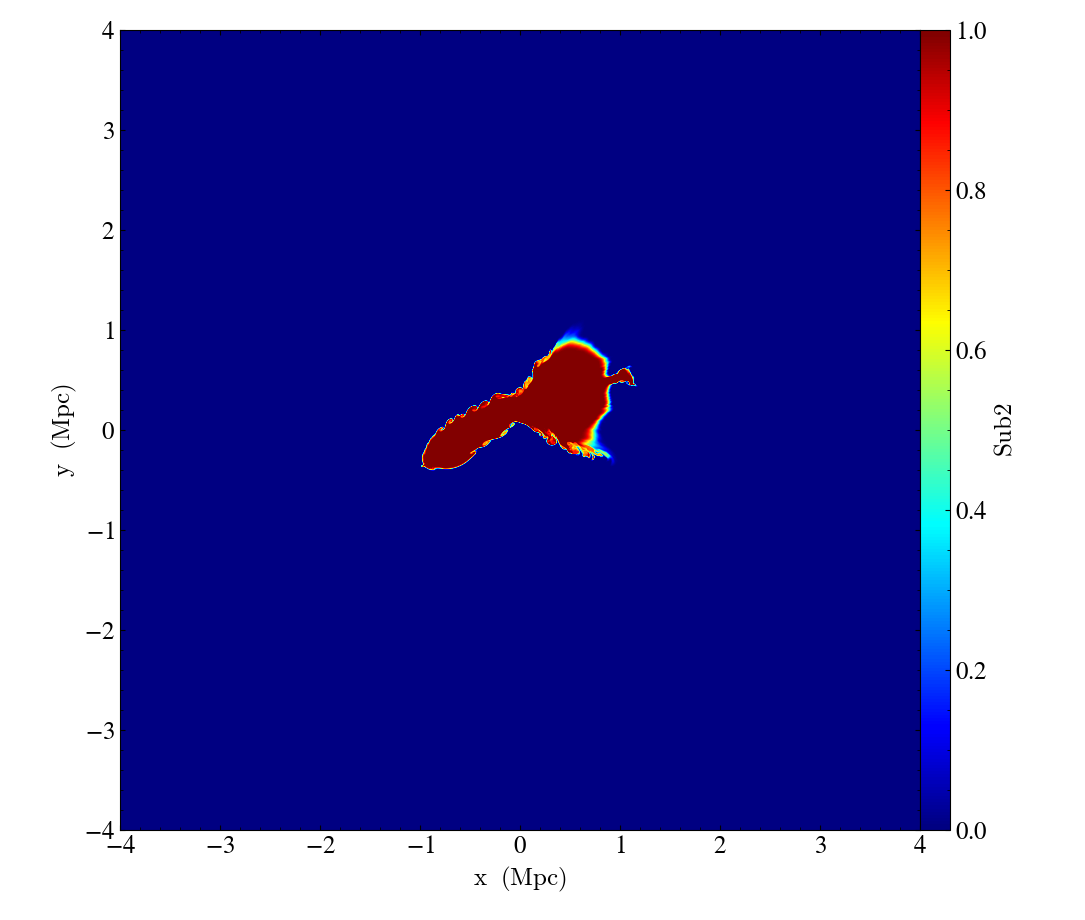

In [4]:
# 363
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','sub2')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'sub2')], 'Blue-Red')
p.set_zlim(('flash', 'sub2'), 0, 1)
p.set_log(('flash', 'sub2'), False)
p.show()

### Temperature

yt : [INFO     ] 2022-12-25 21:24:42,681 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:24:42,682 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:24:42,684 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:24:42,686 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:24:42,688 Making a fixed resolution buffer of (('gas', 'temp_in_keV')) 800 by 800



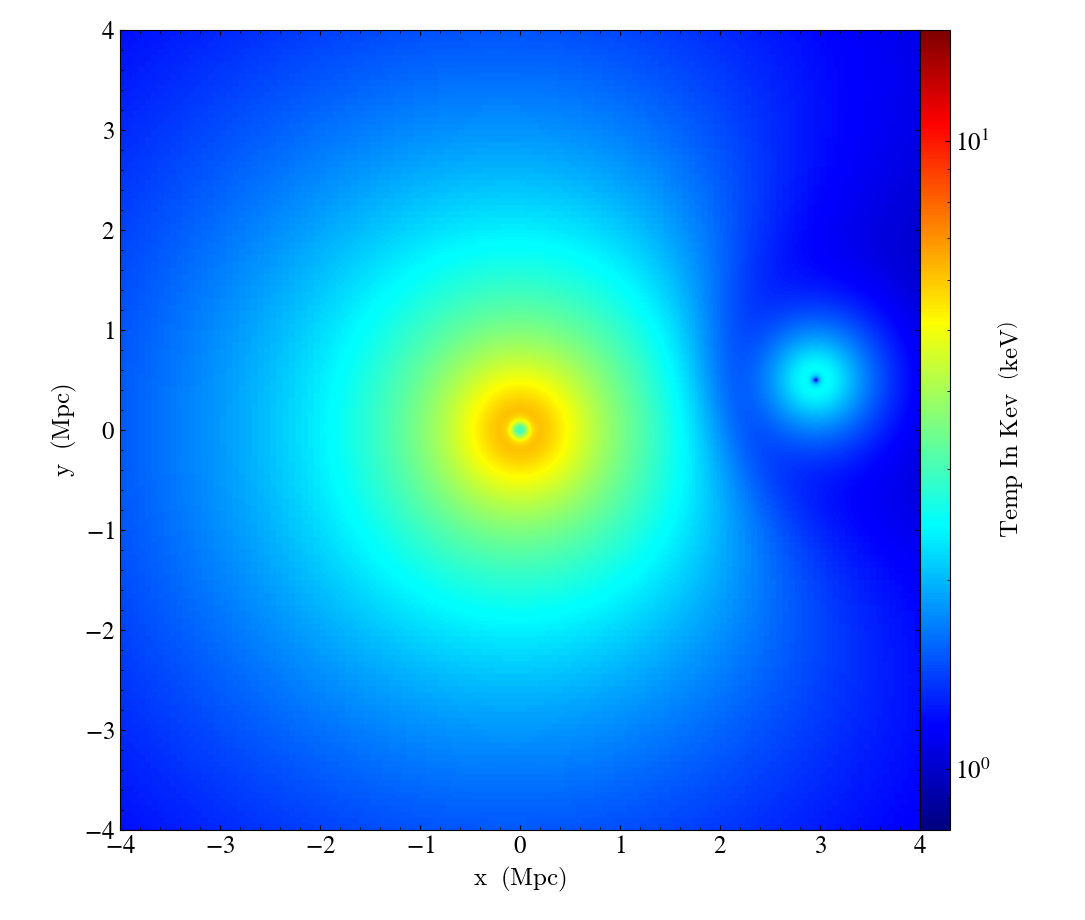

In [27]:
# 180
p = yt.SlicePlot(
    dsIC, 
    'z', 
    [("gas", "temp_in_keV")],
    width = (8, 'Mpc')
)
p.set_cmap([("gas", "temp_in_keV")], 'Blue-Red')
p.set_zlim(("gas", "temp_in_keV"), 0.8, 15)
# p.annotate_contour(('gas','potential'), ncont=20, plot_args={"colors": "gray", "linewidths": 0.5})
p.show()

yt : [INFO     ] 2022-12-26 00:29:36,141 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-26 00:29:36,145 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-26 00:29:36,147 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-26 00:29:36,147 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-26 00:29:36,150 Making a fixed resolution buffer of (('gas', 'temp_in_keV')) 800 by 800



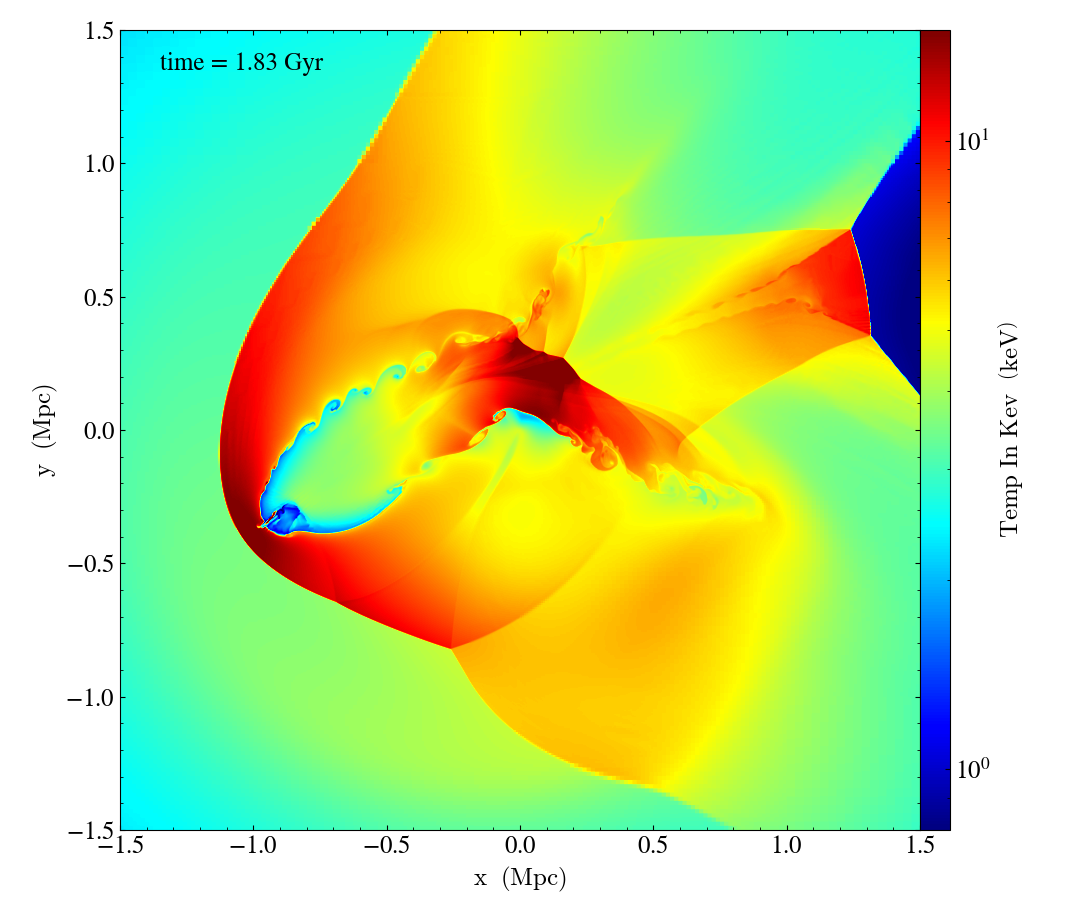

In [67]:
# 363 kT
p = yt.SlicePlot(
    ds, 
    'z', 
    [("gas", "temp_in_keV")],
    width = (3, 'Mpc')
)
p.set_cmap([("gas", "temp_in_keV")], 'Blue-Red')
p.set_zlim(("gas", "temp_in_keV"), 0.8, 15)
p.annotate_text([0.05,0.95],'time = %.2f Gyr' %ds.current_time.in_units('Gyr'),coord_system='axis',text_args={'color':'black'})
p.show()

### Gas density

yt : [INFO     ] 2022-12-26 00:12:45,509 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:12:45,511 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:12:45,512 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:12:45,513 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:12:45,516 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-12-26 00:12:52,306 Saving plot picture/dens180_sub2anno.png



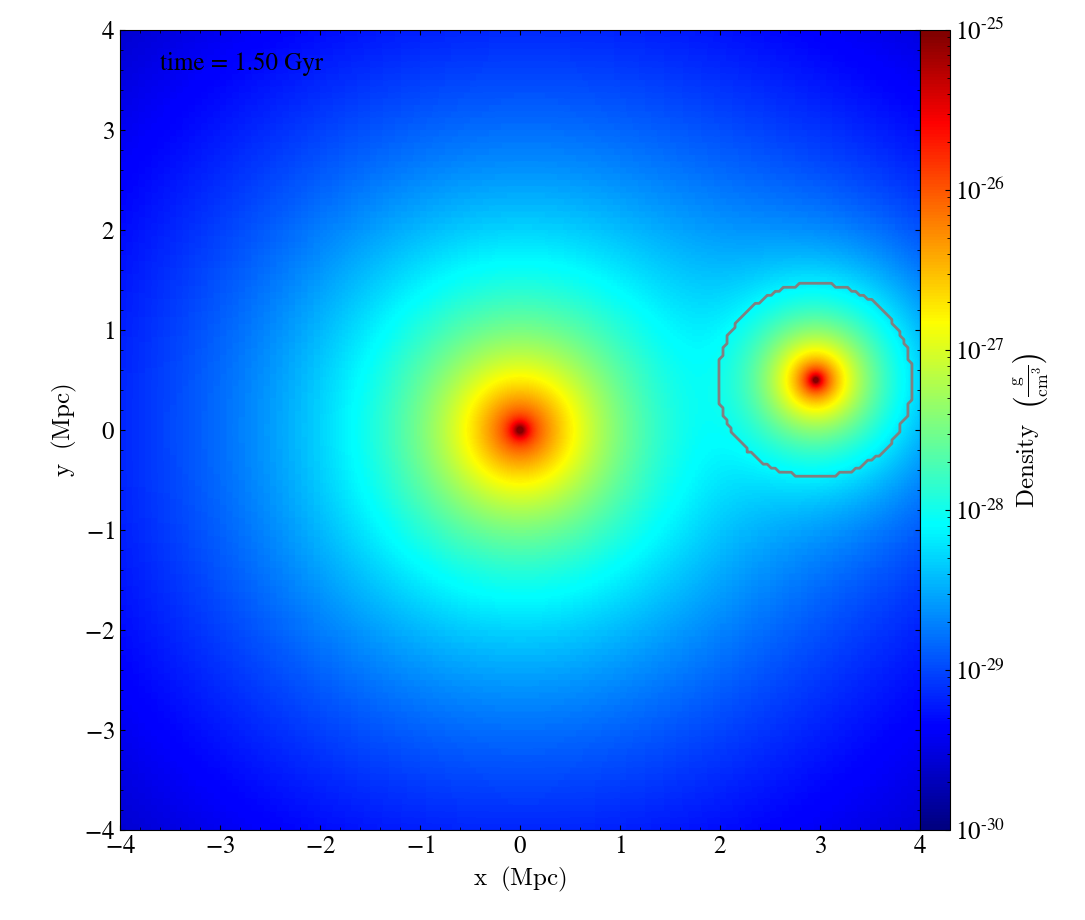

In [60]:
# 180
p = yt.SlicePlot(
    dsIC, 
    'z', 
    [('gas', 'density')],
    width = (8, 'Mpc')
)
p.set_cmap([('gas', 'density')], 'Blue-Red')
p.set_zlim(('gas', 'density'), 1e-30, 1e-25)
p.annotate_contour(('gas', 'sub2'), ncont=0, plot_args={"colors": "gray", "linewidths": 2})
p.annotate_text([0.05,0.95],'time = %.2f Gyr' %ds.current_time.in_units('Gyr'),coord_system='axis',text_args={'color':'black'})
p.save('picture/dens180_sub2anno.png')
p.show()

yt : [INFO     ] 2022-12-26 00:13:51,775 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:13:51,776 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:13:51,778 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:13:51,779 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-26 00:13:51,781 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-12-26 00:14:04,516 Saving plot picture/dens330_sub2anno.png



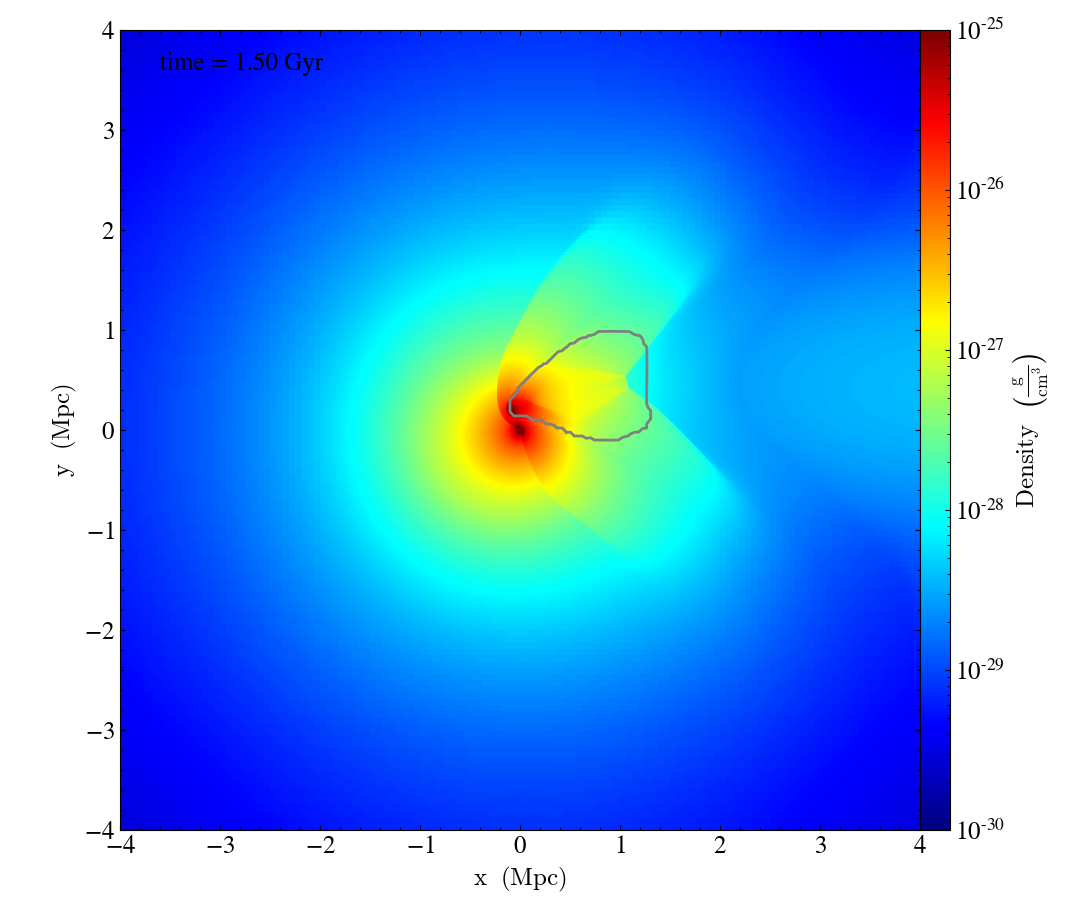

In [61]:
# 363
# 330
p = yt.SlicePlot(
    ds, 
    'z', 
    [('gas', 'density')],
    width = (8, 'Mpc')
)
p.set_cmap([('gas', 'density')], 'Blue-Red')
p.set_zlim(('gas', 'density'), 1e-30, 1e-25)
p.annotate_contour(('gas', 'sub2'), ncont=0, plot_args={"colors": "gray", "linewidths": 2})
p.annotate_text([0.05,0.95],'time = %.2f Gyr' %ds.current_time.in_units('Gyr'),coord_system='axis',text_args={'color':'black'})
p.save('picture/dens330_sub2anno.png')
p.show()


### Pressure

yt : [INFO     ] 2022-12-25 21:26:45,230 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:26:45,232 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:26:45,233 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:26:45,234 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:26:45,237 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800



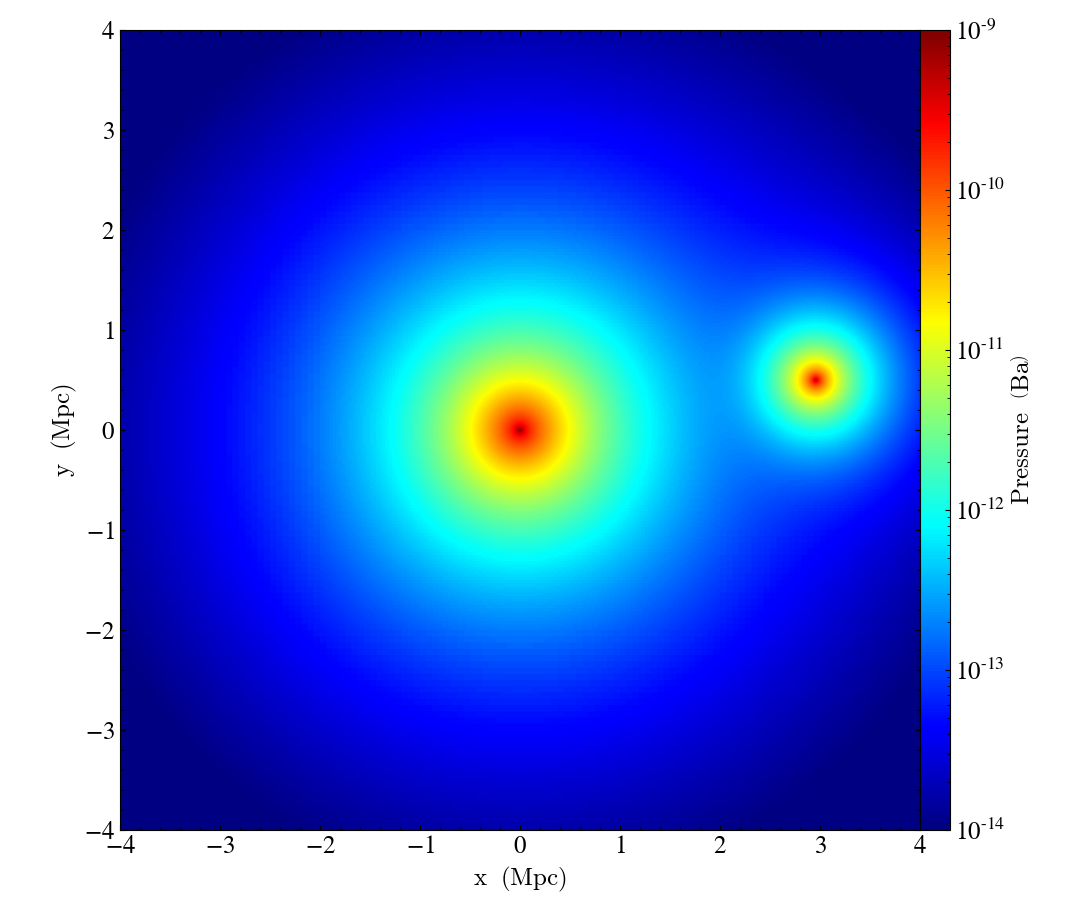

In [30]:
p = yt.SlicePlot(
    dsIC, 
    'z', 
    [('gas', 'pressure')],
    width = (8, 'Mpc')
)
p.set_cmap([('gas', 'pressure')], 'Blue-Red')
p.set_zlim(('gas', 'pressure'), 1e-14, 1e-9)
p.show()

yt : [INFO     ] 2022-12-25 21:20:15,403 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:20:15,405 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:20:15,409 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:20:15,410 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:20:15,413 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800



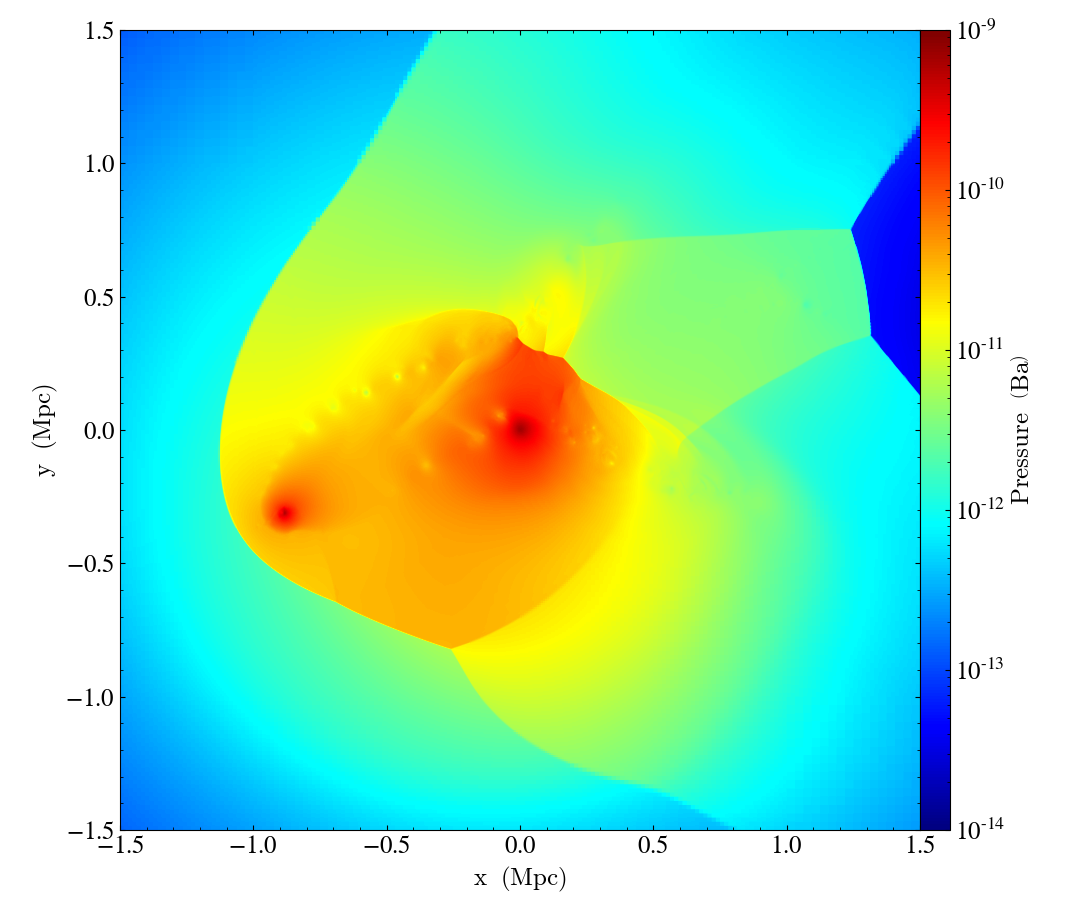

In [22]:
# 363
p = yt.SlicePlot(
    ds, 
    'z', 
    [('gas', 'pressure')],
    width = (3, 'Mpc')
)
p.set_cmap([('gas', 'pressure')], 'Blue-Red')
p.set_zlim(('gas', 'pressure'), 1e-14, 1e-9)
p.show()

yt : [INFO     ] 2022-12-25 21:27:36,472 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:27:36,474 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:27:36,475 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:27:36,476 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-25 21:27:36,479 Making a fixed resolution buffer of (('gas', 'entropy')) 800 by 800



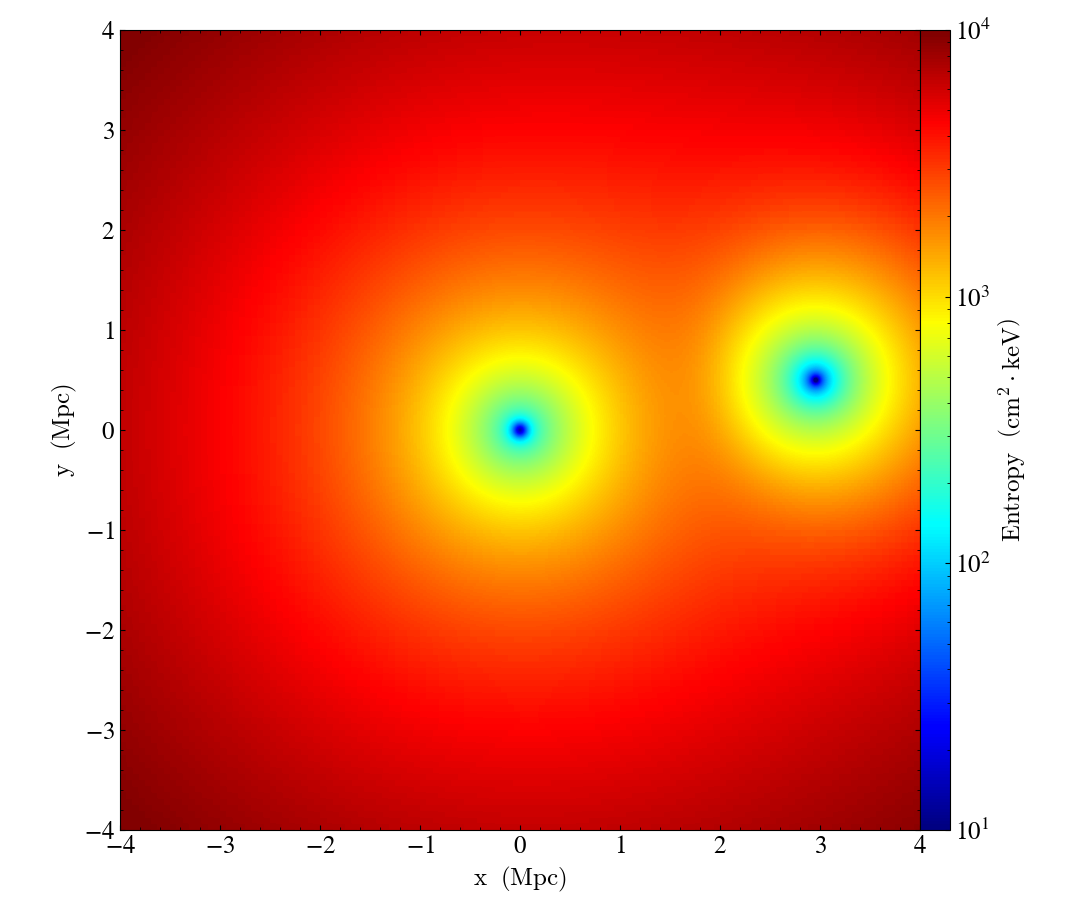

In [31]:
# 180
p = yt.SlicePlot(
    dsIC, 
    'z', 
    [('gas', 'entropy')],
    width = (8, 'Mpc')
)
p.set_cmap([('gas', 'entropy')], 'Blue-Red')
p.set_zlim(('gas', 'entropy'), 1e1, 1e4)
p.show()

### Entropy

yt : [INFO     ] 2022-12-25 21:22:06,469 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:22:06,470 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:22:06,472 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:22:06,473 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 21:22:06,476 Making a fixed resolution buffer of (('gas', 'entropy')) 800 by 800



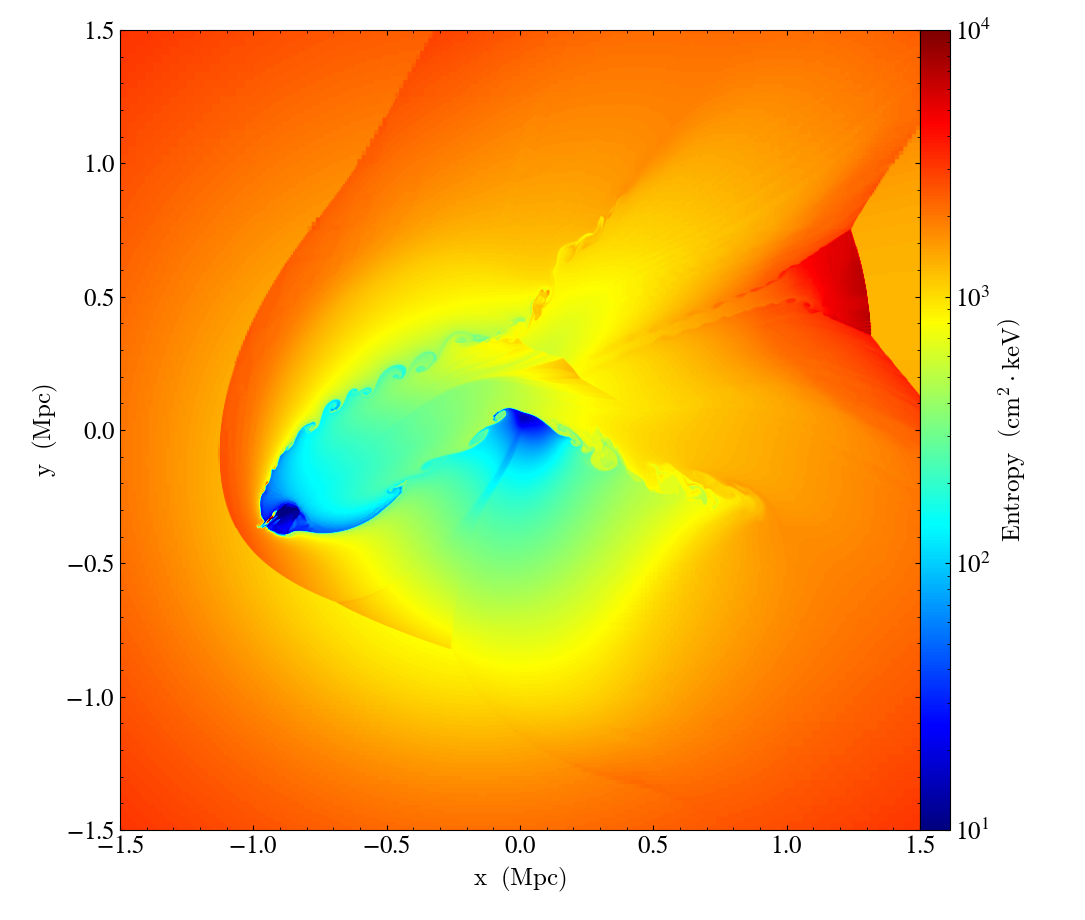

In [24]:
# 363
p = yt.SlicePlot(
    ds, 
    'z', 
    [('gas', 'entropy')],
    width = (3, 'Mpc')
)
p.set_cmap([('gas', 'entropy')], 'Blue-Red')
p.set_zlim(('gas', 'entropy'), 1e1, 1e4)
p.show()

### Gravatational Potential

yt : [INFO     ] 2022-12-20 16:03:59,445 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,446 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,448 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,449 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,452 Making a fixed resolution buffer of (('flash', 'gpot')) 800 by 800
yt : [WARNING  ] 2022-12-20 16:03:59,672 Plotting ('flash', 'gpot'): All negative values. Max = -9299429733034056.0 code_length**2/code_time**2.
yt : [WARNING  ] 2022-12-20 16:03:59,674 Switching to symlog colorbar scaling.



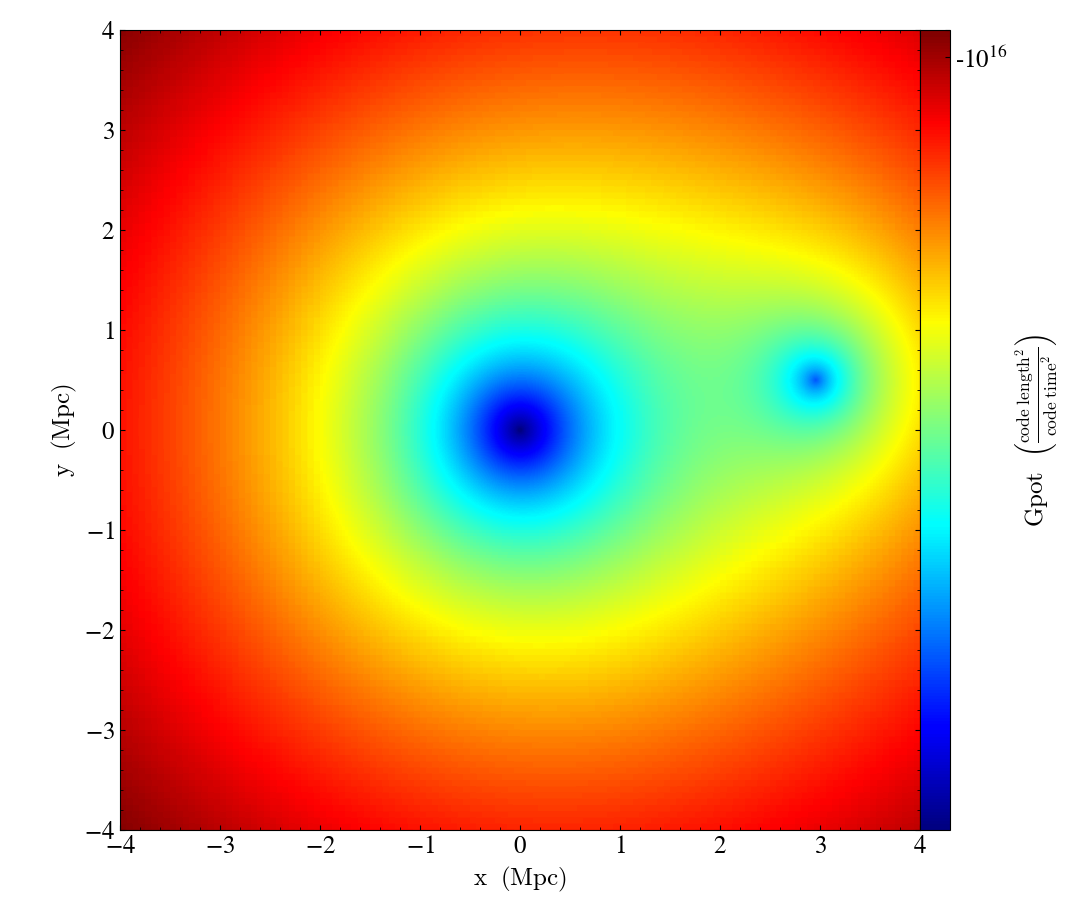

In [10]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','gpot')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'gpot')], 'Blue-Red')
# p.set_zlim(('flash', 'gpot'), -1e-16, -6e-16)
p.show()

yt : [INFO     ] 2022-12-25 00:25:25,573 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 00:25:25,574 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 00:25:25,575 xlim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 00:25:25,576 ylim = -4628516371443487220957184.000000 4628516371443487220957184.000000
yt : [INFO     ] 2022-12-25 00:25:25,578 Making a fixed resolution buffer of (('flash', 'gpot')) 800 by 800
yt : [WARNING  ] 2022-12-25 00:25:26,247 Plotting ('flash', 'gpot'): All negative values. Max = -2.10820856818975e+16 code_length**2/code_time**2.
yt : [WARNING  ] 2022-12-25 00:25:26,251 Switching to symlog colorbar scaling.



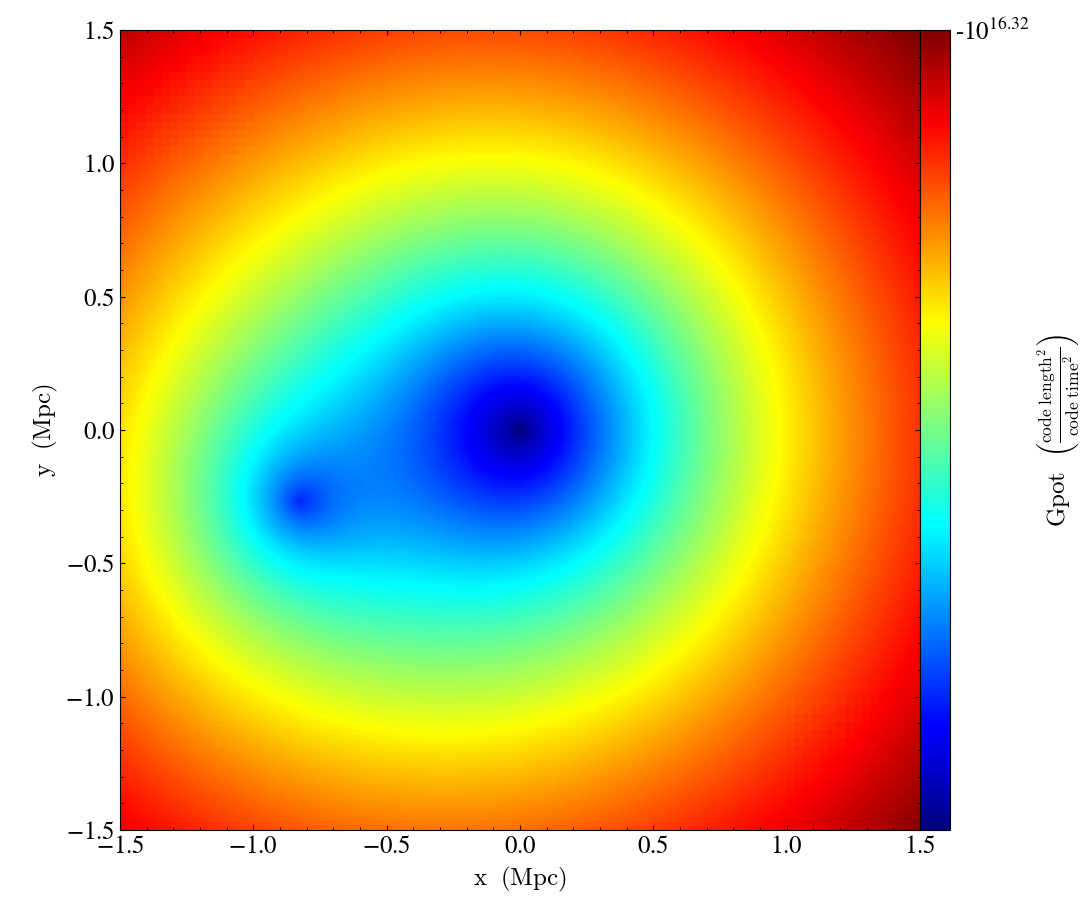

In [10]:
# 360
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','gpot')],
    width = (3, 'Mpc')
)
p.set_cmap([('flash', 'gpot')], 'Blue-Red')
# p.set_zlim(('flash', 'gpot'), -1e-16, -6e-16)
p.show()